<a href="https://colab.research.google.com/github/JSunOO/AIB09_Discussion/blob/master/n221a_decision_trees%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 2 / NOTE 1*

# 📝 Assignment
---

# Decision Trees(결정트리)

## 캐글 인클래스(InClass) Competitions

### 1) 대회 참여(Join) 및 데이터셋 준비

- [캐글 계정을 만드세요](https://www.kaggle.com/), 공유된 인클래스 대회 url을 통해 이동한 후 대회에 참여하세요.
- H1N1 데이터를 훈련/검증/테스트 셋으로 나누어 준비하세요
- **(Urclass Quiz) 훈련데이터셋을 사용해 H1N1 타겟으로 기준모델을 설정하세요. 기준모델의 정확도를 제출하세요.**
    1. 0.24
    2. 0.50
    3. 0.76
    4. 1


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

target = 'vacc_h1n1_f'
# target = 'vacc_seas_f'
train = pd.merge(pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'), 
                 pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv')[target], left_index=True, right_index=True)
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv')
sample_submission = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/submission.csv')

In [17]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, stratify=train[target], random_state=2)

In [18]:
train[target].value_counts(normalize=True).round(2)

0    0.76
1    0.24
Name: vacc_h1n1_f, dtype: float64

In [24]:
train.head().T

,20365,29138,36128,39793,32973
h1n1_concern,1,1,2,2,0
h1n1_knowledge,1,1,2,1,1
behavioral_antiviral_meds,0,0,0,0,0
behavioral_avoidance,0,1,1,1,0
behavioral_face_mask,0,0,0,0,0
behavioral_wash_hands,0,1,1,1,0
behavioral_large_gatherings,0,1,1,0,0
behavioral_outside_home,0,1,1,0,0
behavioral_touch_face,0,1,0,1,0
doctor_recc_h1n1,0,1,0,0,0


### 2) 데이터 EDA 및 특성공학 수행
- profiling을 사용하여 데이터를 살펴보고, missing value, zeros, cardinarity 등을 확인하여 처리하세요.
- 본인만의 특성공학을 수행하세요.


In [ ]:
!pip install pandas-profiling
!pip install category_encoders

In [31]:
from pandas_profiling import ProfileReport

In [20]:
train.duplicated().sum()

192

In [34]:
train=train.drop_duplicates()

In [38]:
import numpy as np

def engineer(df):
  selected_cols = df.select_dtypes(include=['number', 'object'])
  labels = selected_cols.nunique()
  selected_features = labels[labels <= 30].index.tolist()
  df = df[selected_features]
  behaviorals = [col for col in df.columns if 'behavioral' in col] 
  df['behaviorals'] = df[behaviorals].sum(axis=1)
  dels = [col for col in df.columns if ('employment' in col or 'seas' in col)]
  df.drop(columns=dels, inplace=True)
  return df

train = engineer(train)
val = engineer(val)
test = engineer(test)

In [36]:
features = train.drop(columns=[target]).columns

In [37]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [39]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
enc = OneHotEncoder()
imp_mean = SimpleImputer()
scaler = StandardScaler()
model_lr = LogisticRegression(n_jobs=-1)

X_train_encoded = enc.fit_transform(X_train)
X_train_imputed = imp_mean.fit_transform(X_train_encoded)
X_train_scaled = scaler.fit_transform(X_train_imputed)
model_lr.fit(X_train_scaled, y_train)

X_val_encoded = enc.transform(X_val)
X_val_imputed = imp_mean.transform(X_val_encoded)
X_val_scaled = scaler.transform(X_val_imputed)

print('검증세트 정확도', model_lr.score(X_val_scaled, y_val))

X_test_encoded = enc.transform(X_test)
X_test_imputed = imp_mean.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)

y_pred = model_lr.predict(X_test_scaled)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


검증세트 정확도 0.8191199146008777


In [44]:
pipe = make_pipeline(OneHotEncoder(), SimpleImputer(), StandardScaler(), LogisticRegression(n_jobs=-1))
pipe.fit(X_train, y_train)

print('검증세트 정확도', pipe.score(X_val, y_val))

y_pred = pipe.predict(X_test)

검증세트 정확도 0.8191199146008777



### 3) 모델링 수행
- 결정트리를 학습시킵니다. 하이퍼파라미터를 수정하여 성능을 높여보세요. 과적합을 주의하세요!
- 검증세트 스코어를 확인하세요.(평가지표는 F1-score입니다, 수식은 캐글 Overview-Evaluation 페이지를 확인해 주세요. 평가지표에 대한 내용은 다음에 자세히 배우고 활용할 것입니다 지금은 스코어를 올리기 위한 노력을 전혀 기울이지 말고 결정트리의 개념과 코드이해, 사용에 집중하세요!)
- 특성중요도를 그래프로 나타내 보세요
- **(Urclass Quiz) 검증세트의 F1-score를 제출하세요. (0.5 이상 통과)**

In [45]:
from sklearn.tree import DecisionTreeClassifier

pipe= make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=1, criterion= 'gini')
)

pipe.fit(X_train, y_train)
print("Train Acc: ", pipe.score(X_train, y_train))
print("Val Acc: ", pipe.score(X_val, y_val))

Train Acc:  0.9914783927217589
Val Acc:  0.7493772980666588


In [47]:
import matplotlib.pyplot as plt

model_lr = pipe.named_steps['decisiontreeclassifier']
enc = pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns
importances = pd.Series(model_lr.feature_importances_, encoded_columns)

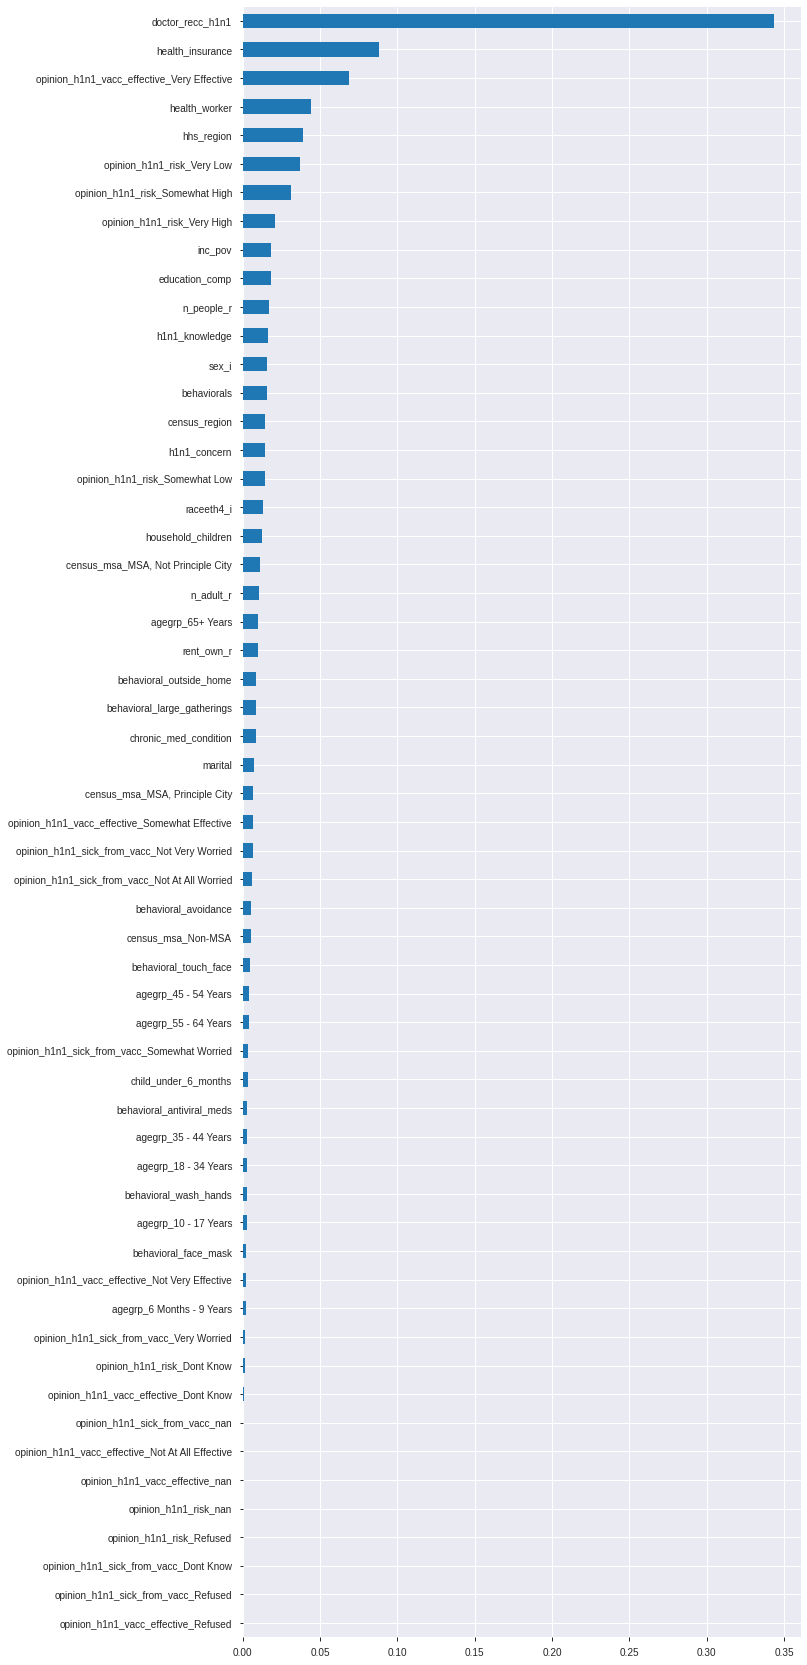

In [48]:
%matplotlib inline
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

In [49]:
from sklearn.metrics import f1_score

f1_score(y_val, pipe.predict(X_val))

0.5412156536219818

### 4) 테스트셋 예측 결과 제출(Submission)

- 테스트셋에 대한 예측 결과를 캐글에 제출 하세요.(스코어가 많이 낮게 나와도 결정트리를 잘 이해하고 결과를 내었다면 충분합니다!)
- **(Urclass Quiz) 캐글 Leaderboard의 본인 Score를 제출하세요.**
 

In [50]:
sample_submission['vacc_h1n1_f'] = pipe.predict(X_test)
sample_submission.to_csv("submit_result.csv", index_label = 'Id', header=True)
from google.colab import files
files.download("submit_result.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 🔥 도전과제(Github - Discussion)

### 4) 2개 이상의 imputer를 사용해 각각 특성-타겟 관계 그래프를 그려 공유하고 다음 질문에 대해 서로 논의해 보세요. 
- scikit-learn imputer([scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html))
- seaborn plots 사용하여 관심있는 특성들과 target간의 관계를 그래프로 나타내 보세요.
- 사용하신 imputer는 각각 어떤 장단점을 갖고 있으며 어떤 상황에서 사용하면 좋을까요? 
- 만드신 특성-타겟 관계 그래프에서 차이점이 있다면 무엇이고, 왜 그런 차이가 발생했다고 생각하시나요? 
- [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html)
- [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html)

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###